<a href="https://colab.research.google.com/github/2303A52243/EXPLAINABLE-AI-LAB/blob/main/Explainable_AI__Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.8812
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12500
           1       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000


Review:  let me first start out by saying 1 out of 10 is too good for this movie it's unfortunate that imdb doesn't have  of a star i watched this abortion of a movie in the middle of the night due to insomnia and it was absolute garbage the plot was horrible the acting was horrible the movie was utterly boring looked like the shadow with alec baldwin the shadow is infinitely better than this as well the character eve was so undeveloped and 2 dimensional she didn't even grab my attention i didn't even know her name was eve don was interesting when he kept his mouth shut the twist if you can call it that was laughable and pathetic when it came the 

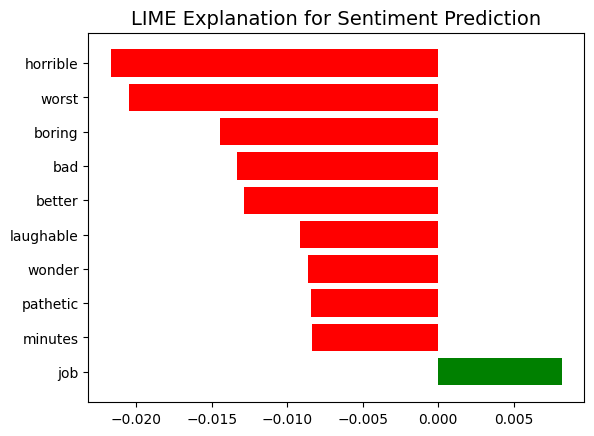

 LIME explanation saved as lime_explanation.html

Word Contributions to Prediction (Positive Sentiment):
horrible        --> -0.0217
worst           --> -0.0205
boring          --> -0.0145
bad             --> -0.0133
better          --> -0.0129
laughable       --> -0.0092
wonder          --> -0.0086
pathetic        --> -0.0084
minutes         --> -0.0083
job             --> 0.0082

Word Importance Table:
        Word    Weight
0   horrible -0.021671
1      worst -0.020477
2     boring -0.014462
3        bad -0.013318
4     better -0.012883
5  laughable -0.009160
6     wonder -0.008647
7   pathetic -0.008423
8    minutes -0.008323
9        job  0.008208


In [5]:
!pip install lime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import lime
import lime.lime_text
from lime.lime_text import LimeTextExplainer
from keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

word_index = imdb.get_word_index()
index_word = {v+3: k for k, v in word_index.items()}
index_word[0] = ""
index_word[1] = ""
index_word[2] = ""

def decode_review(encoded_review):
    return " ".join([index_word.get(i, "?") for i in encoded_review])

X_train_text = [decode_review(x) for x in X_train]
X_test_text = [decode_review(x) for x in X_test]

vectorizer = TfidfVectorizer(max_features=10000, stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

def predict_proba_for_lime(texts):
    return model.predict_proba(vectorizer.transform(texts))

class_names = ["negative", "positive"]
explainer = LimeTextExplainer(class_names=class_names)

idx = 15
sample_review = X_test_text[idx]
print("\nReview:", sample_review)
print("True Label:", class_names[y_test[idx]])
print("Predicted Label:", class_names[y_pred[idx]])

exp = explainer.explain_instance(sample_review,
                                 predict_proba_for_lime,
                                 num_features=10,
                                 labels=[0, 1])

fig = exp.as_pyplot_figure(label=1)
plt.title("LIME Explanation for Sentiment Prediction", fontsize=14)
plt.show()

exp.save_to_file("lime_explanation.html")
print(" LIME explanation saved as lime_explanation.html")

lime_weights = exp.as_list(label=1)
print("\nWord Contributions to Prediction (Positive Sentiment):")
for word, weight in lime_weights:
    print(f"{word:15} --> {weight:.4f}")

df = pd.DataFrame(lime_weights, columns=["Word", "Weight"])
print("\nWord Importance Table:")
print(df)


Test accuracy: 0.978562421185372

Original Text:
 From: banschbach@vms.ocom.okstate.edu
Subject: Re: Kidney Stones
Lines: 68
Nntp-Posting-Host: vms.ocom.okstate.edu
Organization: OSU College of Osteopathic Medicine

In article <1993Apr28.095305.3587@rose.com>, ron.roth@rose.com (ron roth) writes:
>      banschbach@vms.ocom.okstate.edu (Marty Banschbach) writes:
> [...]
> B >  Medicine has not, and probalby never will be, practiced this way.  There
> B >  has always been the use of conventional wisdom.  A very good example is
> B >  kidney stones.  Conventional wisdom(because clinical trails have not been
> B >  done to come up with an effective prevention), was that restricitng the
> B >  intake of calcium and oxalates was the best way to prevent kidney stones
> B >  from forming.  Clinical trials focused on drugs or ultrasonic blasts to
> B >  breakdown the stone once it formed.  Through the recent New England J of
> B >  Medicine article, we now know that conventional wisdom was wron

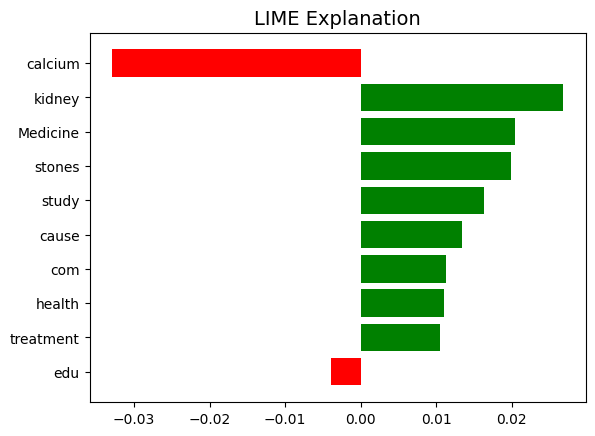

 LIME explanation saved as lime_explanation.html

Word Contributions:
calcium         --> -0.0329
kidney          --> 0.0268
Medicine        --> 0.0205
stones          --> 0.0199
study           --> 0.0164
cause           --> 0.0135
com             --> 0.0114
health          --> 0.0111
treatment       --> 0.0106
edu             --> -0.0039

Word Importance Table:
        Word    Weight
0    calcium -0.032892
1     kidney  0.026802
2   Medicine  0.020465
3     stones  0.019939
4      study  0.016390
5      cause  0.013480
6        com  0.011357
7     health  0.011073
8  treatment  0.010568
9        edu -0.003859


In [6]:
import lime
import lime.lime_text
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

newsgroups_train = fetch_20newsgroups(subset='train', categories=['rec.sport.baseball', 'sci.med'])
newsgroups_test = fetch_20newsgroups(subset='test', categories=['rec.sport.baseball', 'sci.med'])

vectorizer = TfidfVectorizer(stop_words='english')
model = LogisticRegression(max_iter=2000)
pipeline = make_pipeline(vectorizer, model)
pipeline.fit(newsgroups_train.data, newsgroups_train.target)

print("Test accuracy:", pipeline.score(newsgroups_test.data, newsgroups_test.target))

class_names = ['baseball', 'medicine']
explainer = lime.lime_text.LimeTextExplainer(class_names=class_names)

idx = 10
sample_text = newsgroups_test.data[idx]

exp = explainer.explain_instance(sample_text, pipeline.predict_proba, num_features=10)

print("\nOriginal Text:\n", sample_text)
print("\nPrediction probabilities:", pipeline.predict_proba([sample_text]))

fig = exp.as_pyplot_figure(label=1)
plt.title("LIME Explanation", fontsize=14)
plt.show()

exp.save_to_file("lime_explanation.html")
print(" LIME explanation saved as lime_explanation.html")

lime_weights = exp.as_list(label=1)
print("\nWord Contributions:")
for word, weight in lime_weights:
    print(f"{word:15} --> {weight:.4f}")

df = pd.DataFrame(lime_weights, columns=["Word", "Weight"])
print("\nWord Importance Table:")
print(df)
